In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/question2/esg.csv
/kaggle/input/stock-prices/sg_stock_prices.csv


In [2]:
sgx = pd.read_csv('/kaggle/input/stock-prices/sg_stock_prices.csv')
esg = pd.read_csv('/kaggle/input/question2/esg.csv')

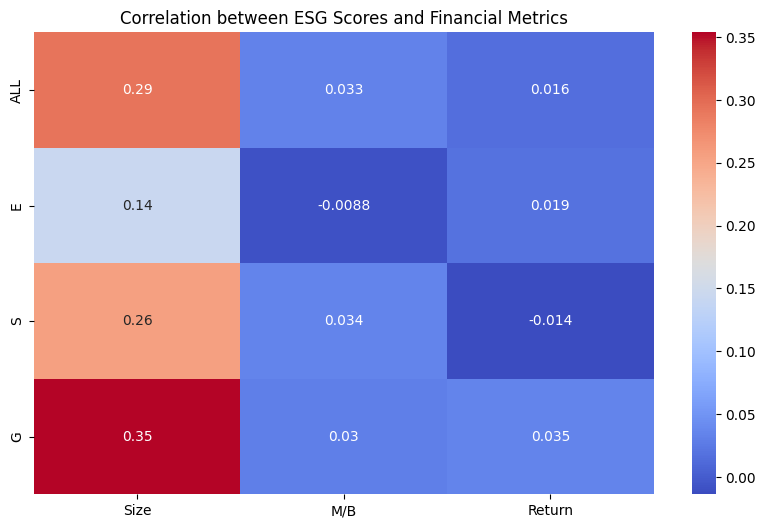

In [4]:
merged_df = pd.merge(sgx, esg, on=['Company Name', 'GVKEY', 'Year'])

correlation_matrix = merged_df[['ALL', 'E', 'S', 'G', 'Size', 'M/B', 'Return']].corr()

esg_correlations = correlation_matrix.loc[['ALL', 'E', 'S', 'G'], ['Size', 'M/B', 'Return']]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(esg_correlations, annot=True, cmap='coolwarm')
plt.title('Correlation between ESG Scores and Financial Metrics')
plt.show()